<a href="https://colab.research.google.com/github/Bbat54/Bbat54/blob/main/IntroToDataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Viz with a Few Libraries

This is a brief introduction to data visualization using a few different libraries: matplotlib, seaborn, and altair.

These are very rich libraries with many methods and important features that we won't have time to exhaustively explore.

https://www.data-to-viz.com/


https://matplotlib.org/stable/

https://seaborn.pydata.org/

https://altair-viz.github.io/


## Matplotlib

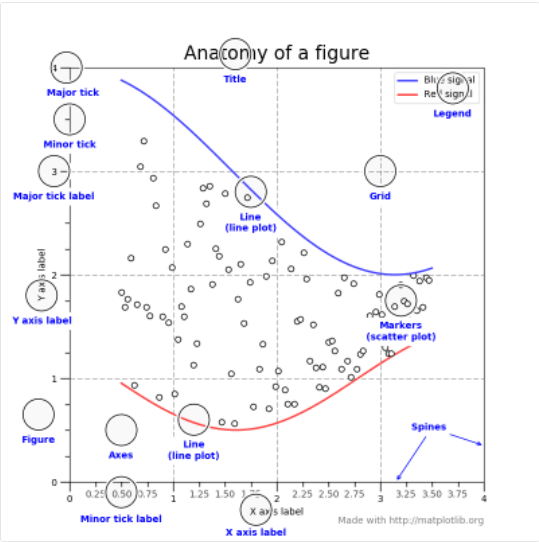

**Figure**

The whole figure. The figure keeps track of all the child Axes, a smattering of ‘special’ artists (titles, figure legends, etc), and the canvas. (Don’t worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can have any number of Axes, but to be useful should have at least one.

The easiest way to create a new figure is with pyplot:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

mydata = pd.read_csv("/content/cereals.csv")

fig = plt.figure()
fig, ax_lst = plt.subplots(2, 2)



**Axes**

This is what you think of as ‘a plot’, it is the region of the image with the data space (marked as the inner blue box). A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via set via the set_xlim() and set_ylim() Axes methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and it’s member functions are the primary entry point to working with the OO interface.

**Axis**

These are the number-line-like objects (circled in green). They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

**Artist**

Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

In [ ]:
fig, ax = plt.subplots(figsize = (9, 9))

ax.hist(mydata["calories"])

## Seaborn

Seaborn is a Python data visualization library based on matplotlib, with a high-level interface.

Seaborn integrates more closely with pandas data structures than matplotlib does. It's dataset-oriented, and so the API is much closer to ggplot where you specify what different elements of your plot(s) mean, rather than the details of how to draw them.

In [ ]:
import seaborn as sns

sns.boxplot(x = mydata["shelf"], y = mydata["sugars"])

In [ ]:
sns.regplot(x = mydata["calories"], y = mydata["sugars"])
#sns.regplot(x = mydata["calories"], y = mydata["sugars"], fit_reg=False)

In [ ]:
sns.scatterplot(data = mydata,
                x = "calories",
                y = "sugars",
                hue = "shelf",
                size = "fat")

# Altair

Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite.

We start with a top-level Chart object which takes the dataframe as argument. Then we specify the type of the plot. The encode function takes the columns, relations, and transformations to be plotted. Anything we put in the encode function needs to be linked to the dataframe passed to the Chart. Finall, the properties function adjust the size of the plot.

In [ ]:
import altair as alt

alt.Chart(mydata).mark_circle().encode(
  x='calories', y='sugars', color='shelf'
).properties(height=300, width=450)

In [ ]:
alt.Chart(mydata).mark_circle().encode(
  x='calories', y='sugars', color='shelf', size='fat'
).properties(height=300, width=450)